In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
affvids_db = niidb.FMriActivationsDb('data/affvids2018.db')

In [5]:
dtfa = DTFA.DeepTFA(affvids_db.all(), mask='/home/eli/Documents/AffVids_20180104/nifti/wholebrain2.nii.gz', num_factors=100, embedding_dim=2)

01/12/2019 23:33:20 Loading Nifti image /home/eli/Documents/AffVids_20180104/nifti/sub-23_task-AffVids_run-02_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/AffVids_20180104/nifti/wholebrain2.nii.gz (zscore=True, smooth=6)
01/12/2019 23:33:37 Loading Nifti image /home/eli/Documents/AffVids_20180104/nifti/sub-23_task-AffVids_run-03_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/AffVids_20180104/nifti/wholebrain2.nii.gz (zscore=True, smooth=6)
01/12/2019 23:33:53 Loading Nifti image /home/eli/Documents/AffVids_20180104/nifti/sub-15_task-AffVids_run-01_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/AffVids_20180104/nifti/wholebrain2.nii.gz (zscore=True, smooth=6)
01/12/2019 23:34:09 Loading Nifti image /home/eli/Documents/AffVids_20180104/nifti/sub-15_task-AffVids_run-02_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/AffVids_20180104/nifti/wholebrain2.nii.gz (zscore=True, sm

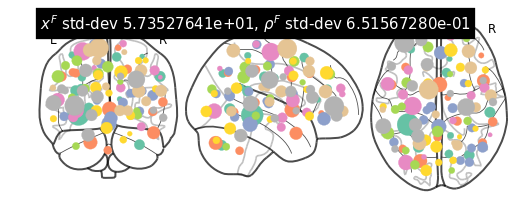

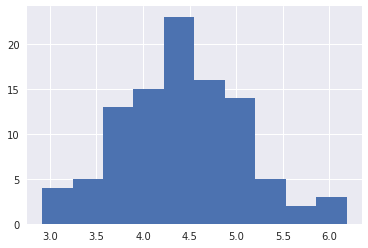

(<nilearn.plotting.displays.OrthoProjector at 0x7f0ad8485978>,
 tensor([[-3.8120e+01, -4.2499e+01,  5.7395e+01],
         [ 5.4481e+01, -2.4874e+01,  3.4862e+01],
         [-3.1495e+01, -3.7780e+01, -5.1555e+00],
         [-2.8688e+01,  4.1523e+01,  2.2548e+01],
         [ 1.1357e+01, -6.8699e+01,  3.8612e+01],
         [ 1.2049e+01,  3.1332e+01,  1.0904e+01],
         [ 3.2771e+01, -6.9995e+01, -3.6949e+01],
         [ 3.5607e+01, -1.8761e+01,  5.5821e+01],
         [-2.0500e+01, -6.1370e+01,  1.2671e+00],
         [ 1.3070e+01, -4.9318e+01,  2.3783e+01],
         [-3.4354e+01, -4.2676e+01,  1.9892e+01],
         [-2.7777e+01, -1.4345e+01,  3.3965e+01],
         [ 8.7891e+00,  1.6926e+01,  5.5332e+01],
         [ 1.4951e+00,  4.2959e+00,  3.5529e-01],
         [ 4.5399e+01,  3.4940e+01, -3.0925e+00],
         [-3.7305e+01, -6.3279e+01,  3.9213e+01],
         [ 4.7636e+01,  8.3080e+00, -2.4351e+01],
         [ 1.0331e+01, -9.4321e+00,  6.4991e+01],
         [-3.4150e+01,  2.2617e+01,  

In [6]:
dtfa.visualize_factor_embedding()

In [7]:
def task_labeler(b):
    if 'heights' in b.task:
        return 'Heights'
    elif 'social' in b.task:
        return 'Social threat'
    elif 'spider' in b.task:
        return 'Spiders'
    elif 'rest' in b.task:
        return 'Rest'
    else:
        return None

def rest_task_labeler(b):
    if b.task == 'rest':
        return 'Rest'
    else:
        return 'Task'

In [8]:
losses = dtfa.train(num_steps=1000, learning_rate=1e-2, log_level=logging.INFO, num_particles=1,
                    batch_size=15, use_cuda=True, checkpoint_steps=500, blocks_batch_size=8, patience=100)

01/12/2019 23:52:10 [Epoch 1] (125375ms) Posterior free-energy 2.63441459e+09 = KL from prior 6.02707227e+03 - log-likelihood -2.63440845e+09
01/12/2019 23:52:10 Saving checkpoint...
01/12/2019 23:54:13 [Epoch 2] (123628ms) Posterior free-energy 2.40976384e+09 = KL from prior 2.67659180e+04 - log-likelihood -2.40973670e+09
01/12/2019 23:56:17 [Epoch 3] (123588ms) Posterior free-energy 2.34349363e+09 = KL from prior 5.23309766e+04 - log-likelihood -2.34344064e+09
01/12/2019 23:58:21 [Epoch 4] (123759ms) Posterior free-energy 2.31615949e+09 = KL from prior 7.82445156e+04 - log-likelihood -2.31608166e+09
01/13/2019 00:00:24 [Epoch 5] (123739ms) Posterior free-energy 2.30204237e+09 = KL from prior 1.02862367e+05 - log-likelihood -2.30193971e+09
01/13/2019 00:02:28 [Epoch 6] (123561ms) Posterior free-energy 2.29350016e+09 = KL from prior 1.29418641e+05 - log-likelihood -2.29337037e+09
01/13/2019 00:04:31 [Epoch 7] (123442ms) Posterior free-energy 2.28801690e+09 = KL from prior 1.53980391e+0

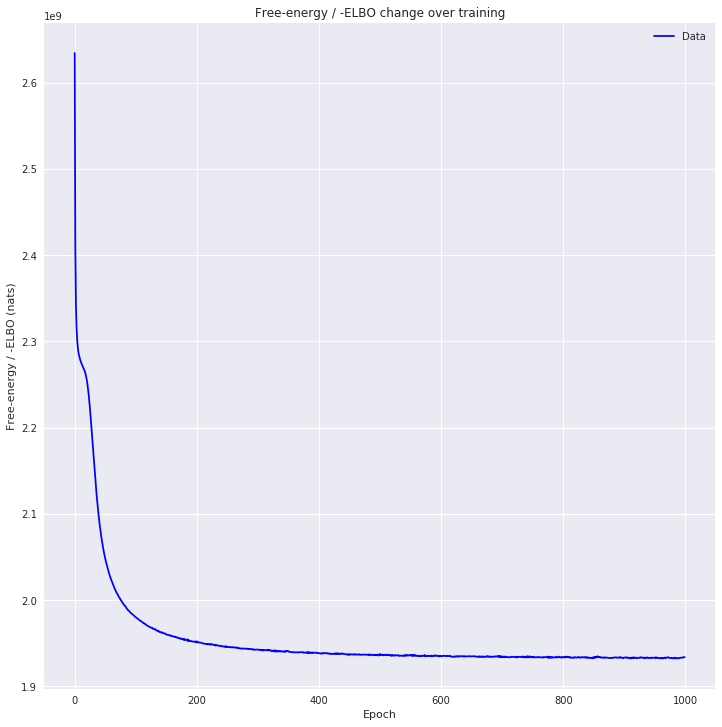

In [9]:
utils.plot_losses(losses)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


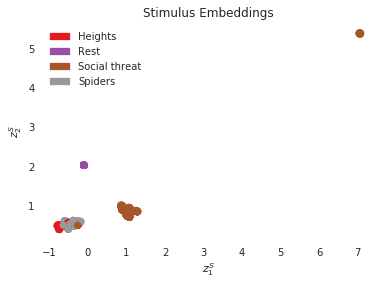

In [10]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None)

In [11]:
def subject_labeler(block):
    return 'Subject %d' % block.subject

def subject_run_labeler(block):
    return 'sub%drun%d' % (block.subject, block.run)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


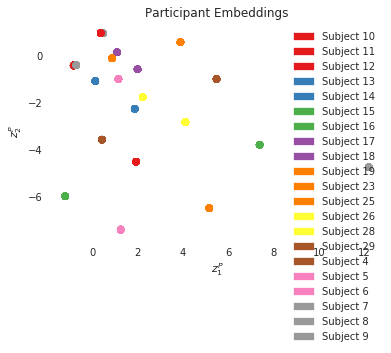

In [12]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


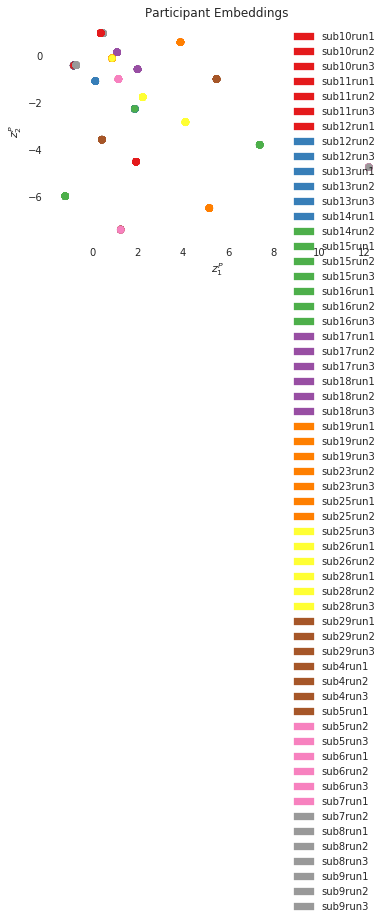

In [13]:
dtfa.scatter_subject_embedding(labeler=subject_run_labeler, figsize=None)

01/14/2019 10:01:37 Plotting factors for Participant 4, run 1


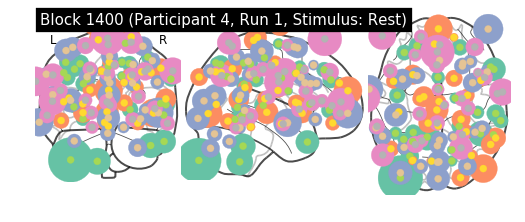

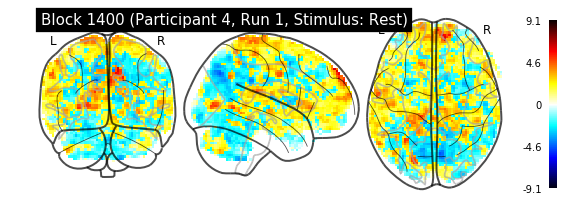

01/14/2019 10:01:41 Reconstruction Error (Frobenius Norm): 1.21248511e+03 out of 1.46850183e+03


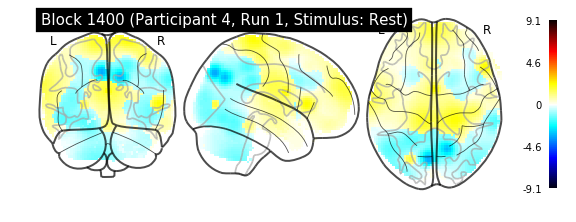

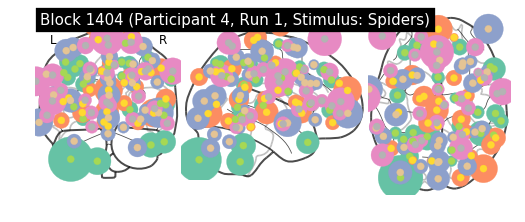

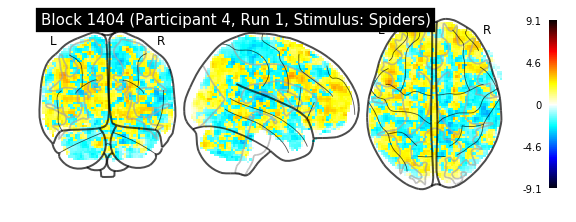

01/14/2019 10:01:45 Reconstruction Error (Frobenius Norm): 1.10364563e+03 out of 1.30499927e+03


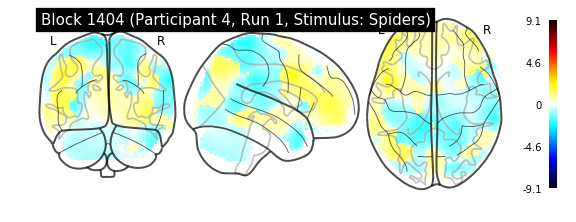

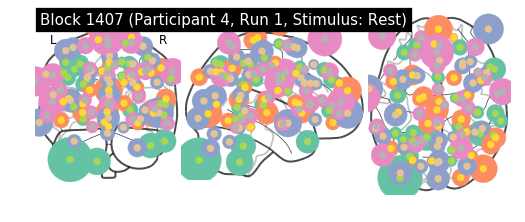

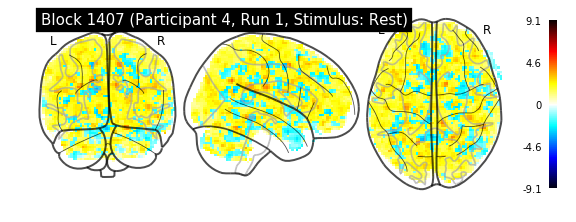

01/14/2019 10:01:49 Reconstruction Error (Frobenius Norm): 1.06497339e+03 out of 1.20300598e+03


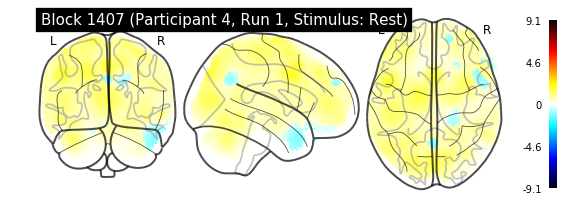

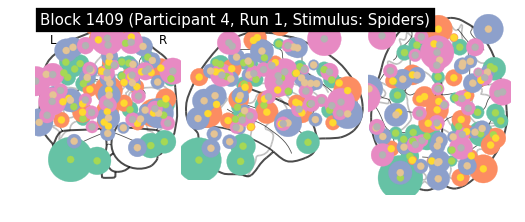

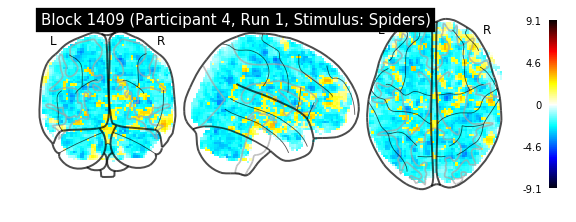

01/14/2019 10:01:54 Reconstruction Error (Frobenius Norm): 1.08444629e+03 out of 1.25223035e+03


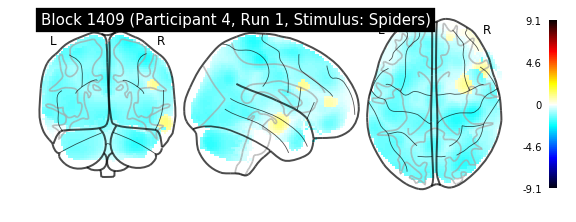

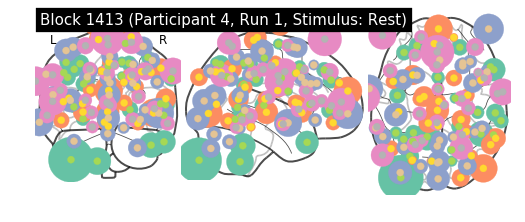

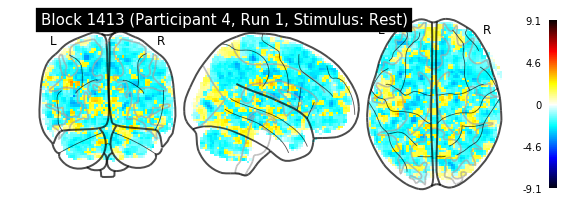

01/14/2019 10:01:58 Reconstruction Error (Frobenius Norm): 1.11516138e+03 out of 1.27125488e+03


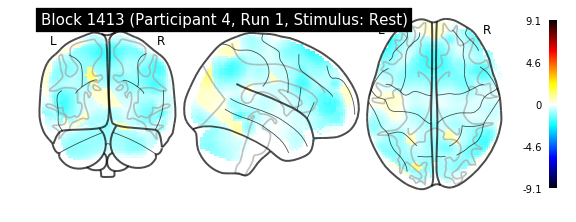

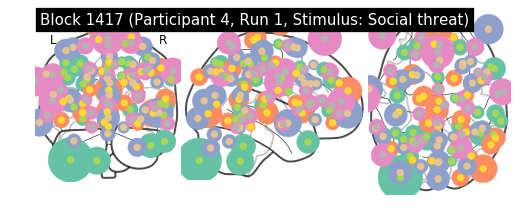

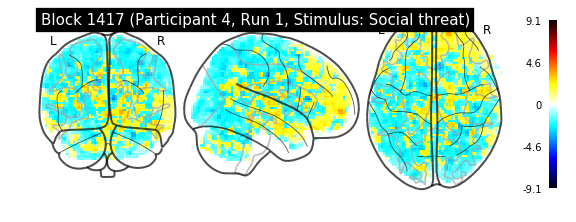

01/14/2019 10:02:02 Reconstruction Error (Frobenius Norm): 1.07443750e+03 out of 1.25480652e+03


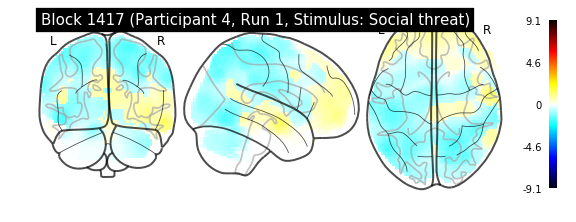

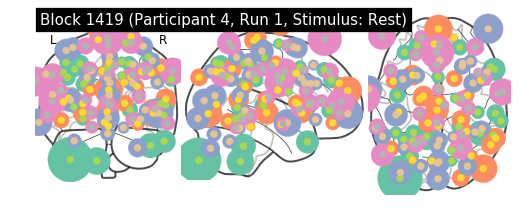

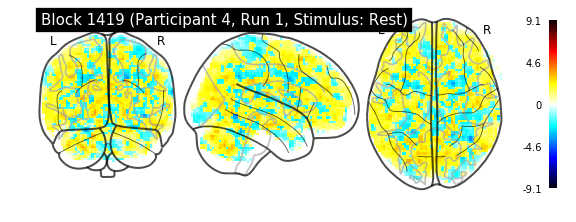

01/14/2019 10:02:06 Reconstruction Error (Frobenius Norm): 1.09696667e+03 out of 1.28385303e+03


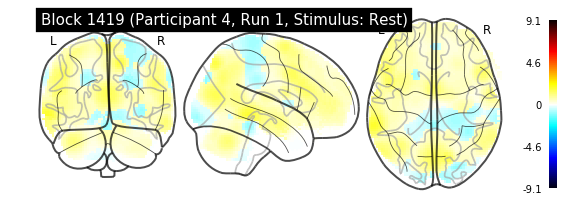

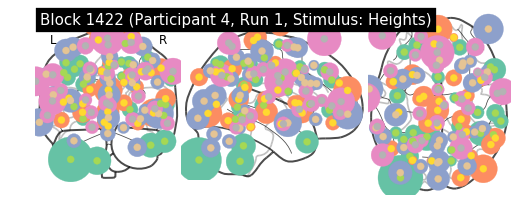

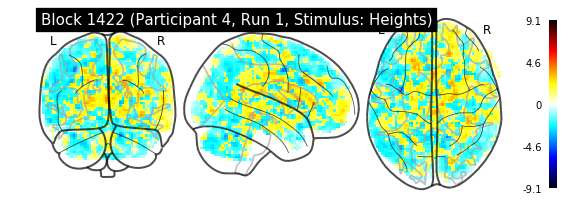

01/14/2019 10:02:10 Reconstruction Error (Frobenius Norm): 1.10801013e+03 out of 1.59316724e+03


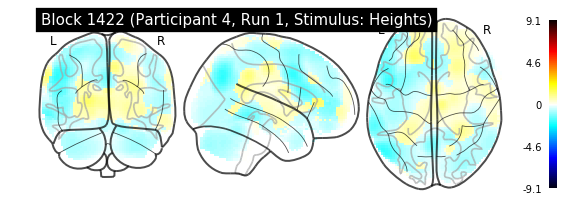

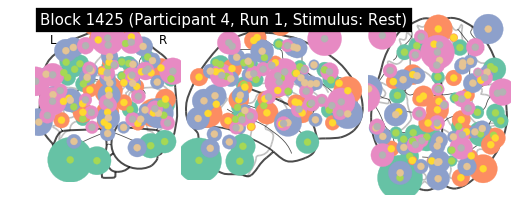

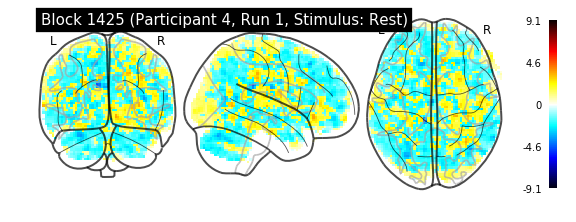

01/14/2019 10:02:14 Reconstruction Error (Frobenius Norm): 1.06925073e+03 out of 1.26270374e+03


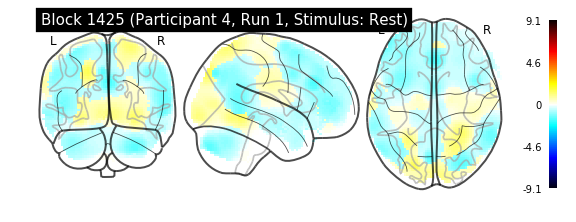

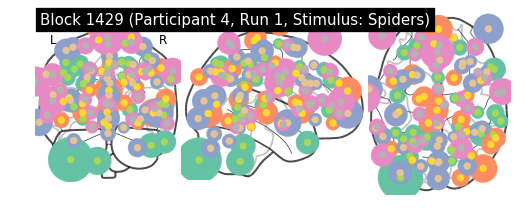

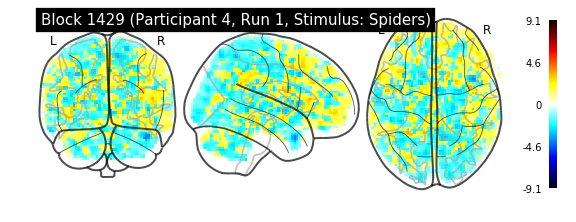

01/14/2019 10:02:18 Reconstruction Error (Frobenius Norm): 1.07437585e+03 out of 1.24118530e+03


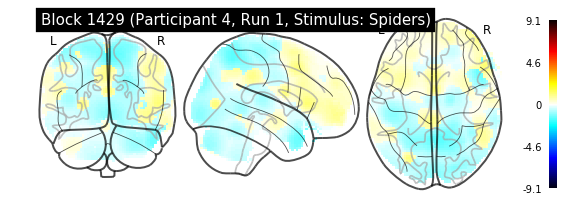

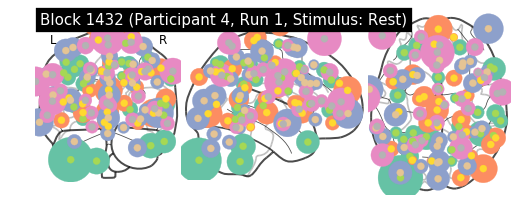

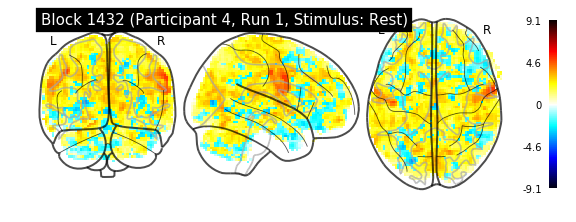

01/14/2019 10:02:23 Reconstruction Error (Frobenius Norm): 1.13102881e+03 out of 1.29287830e+03


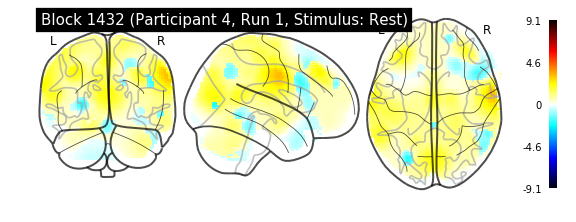

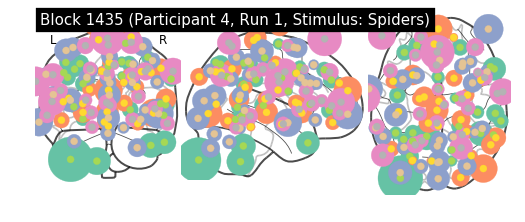

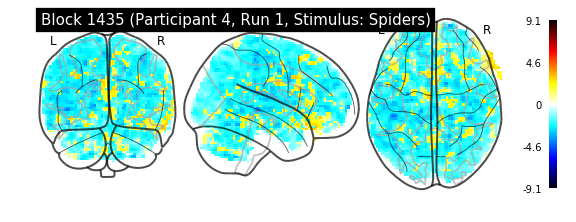

01/14/2019 10:02:27 Reconstruction Error (Frobenius Norm): 1.04314380e+03 out of 1.19165735e+03


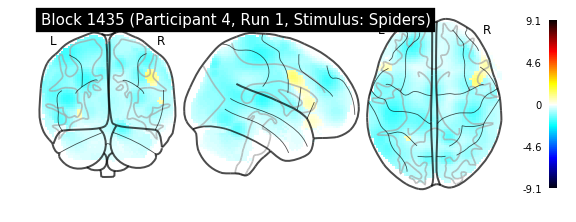

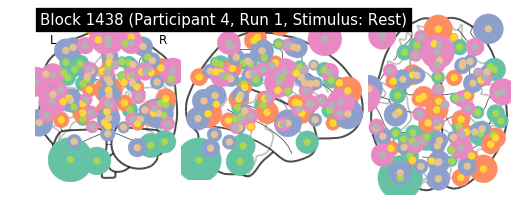

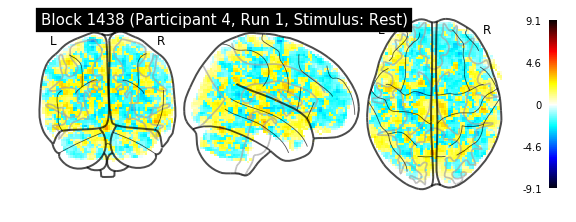

01/14/2019 10:02:31 Reconstruction Error (Frobenius Norm): 1.04587573e+03 out of 1.14850220e+03


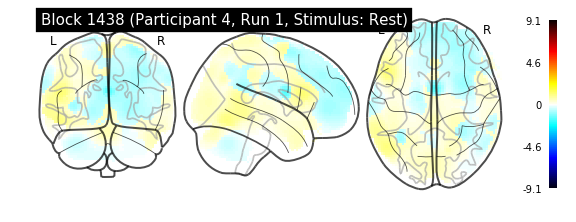

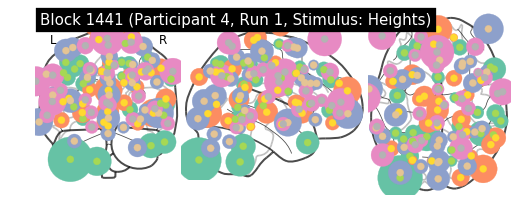

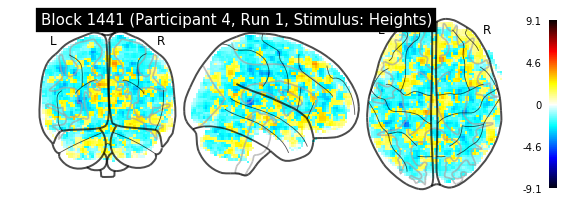

01/14/2019 10:02:35 Reconstruction Error (Frobenius Norm): 1.07063318e+03 out of 1.26875439e+03


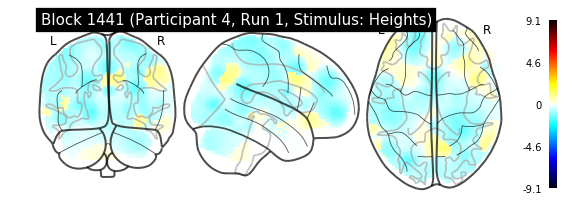

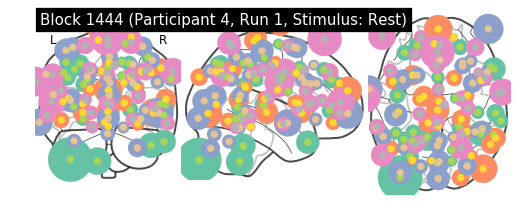

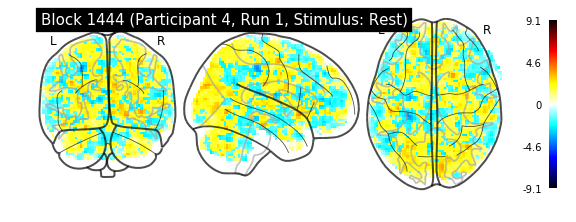

01/14/2019 10:02:39 Reconstruction Error (Frobenius Norm): 1.07075085e+03 out of 1.23068970e+03


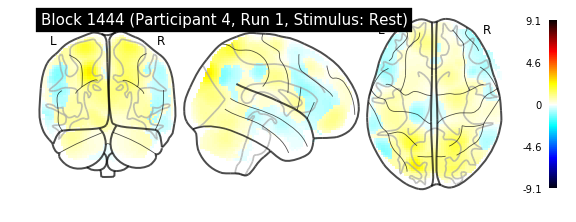

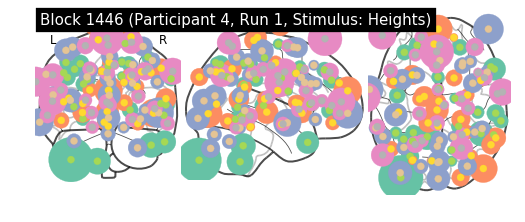

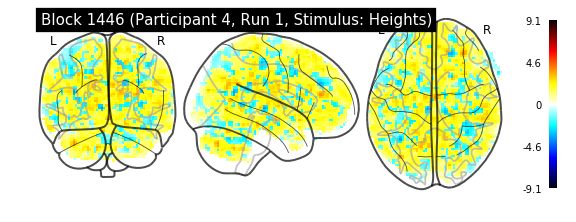

01/14/2019 10:02:43 Reconstruction Error (Frobenius Norm): 9.90409485e+02 out of 1.14596521e+03


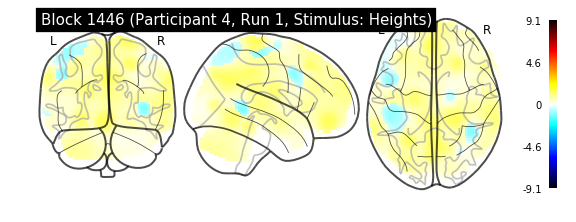

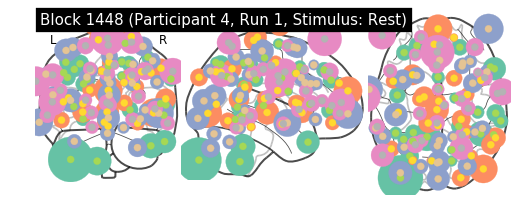

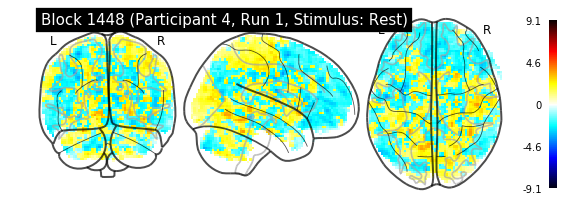

01/14/2019 10:02:47 Reconstruction Error (Frobenius Norm): 1.11906323e+03 out of 1.29200696e+03


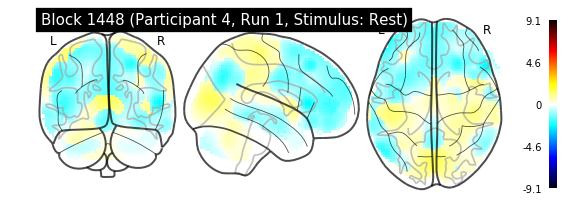

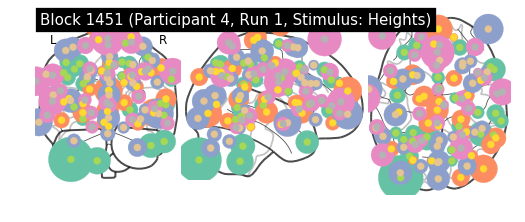

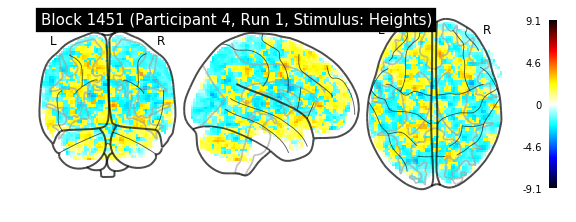

01/14/2019 10:02:51 Reconstruction Error (Frobenius Norm): 1.11910596e+03 out of 1.33834375e+03


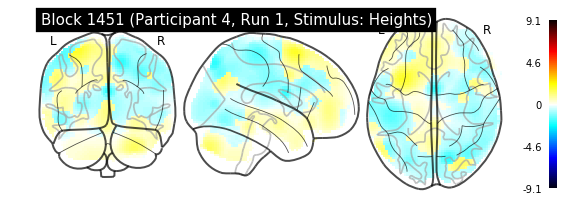

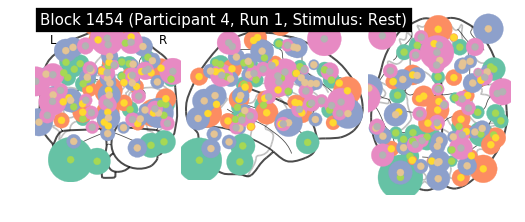

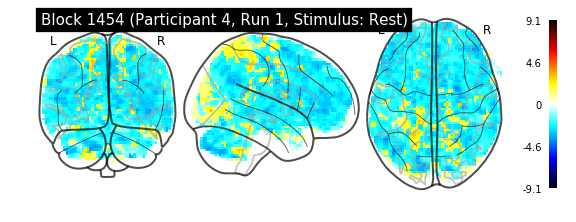

01/14/2019 10:02:56 Reconstruction Error (Frobenius Norm): 1.13230225e+03 out of 1.32915161e+03


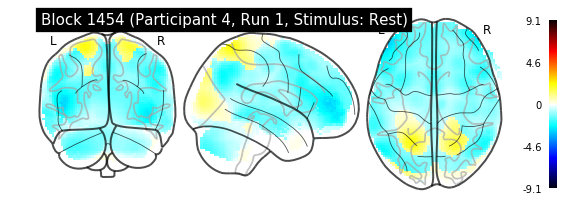

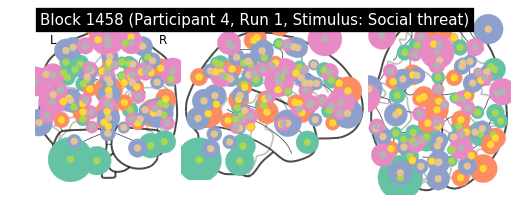

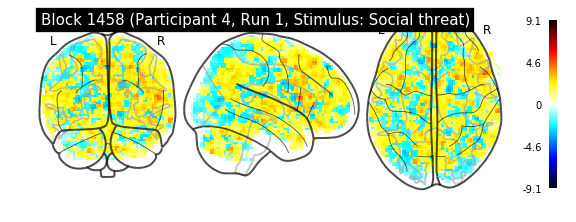

01/14/2019 10:03:00 Reconstruction Error (Frobenius Norm): 1.13299255e+03 out of 1.43906042e+03


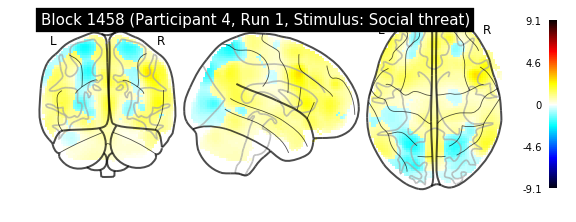

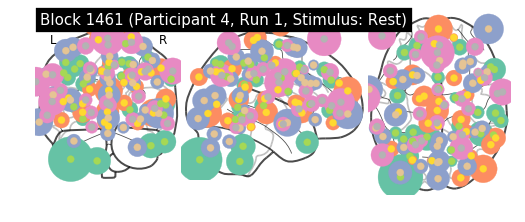

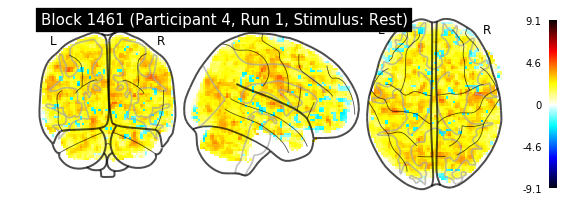

01/14/2019 10:03:04 Reconstruction Error (Frobenius Norm): 1.08153418e+03 out of 1.27160986e+03


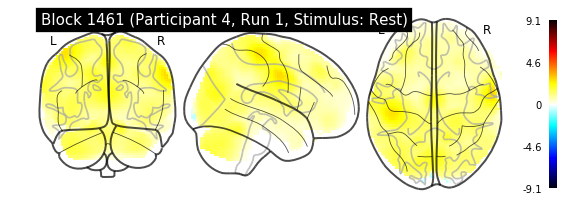

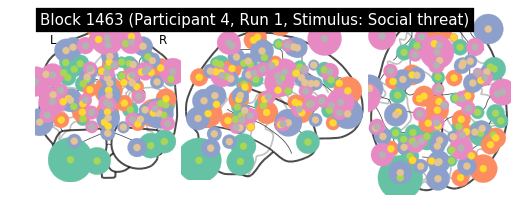

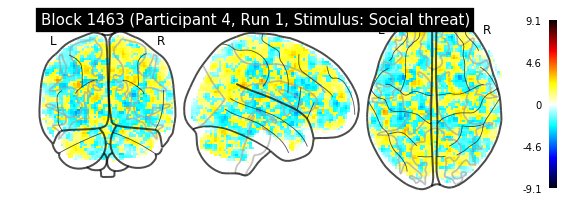

01/14/2019 10:03:08 Reconstruction Error (Frobenius Norm): 1.12191406e+03 out of 1.30288196e+03


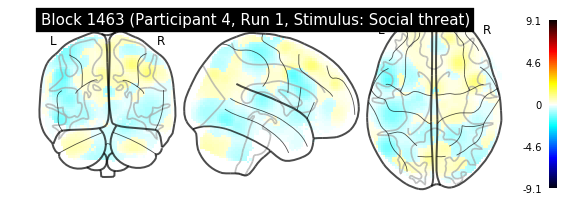

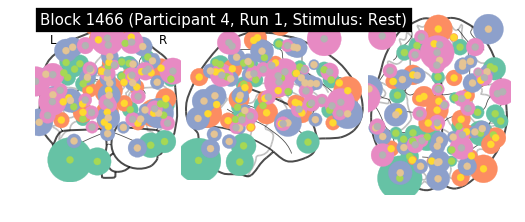

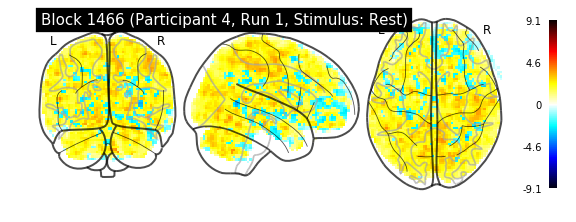

01/14/2019 10:03:12 Reconstruction Error (Frobenius Norm): 1.11079956e+03 out of 1.35790002e+03


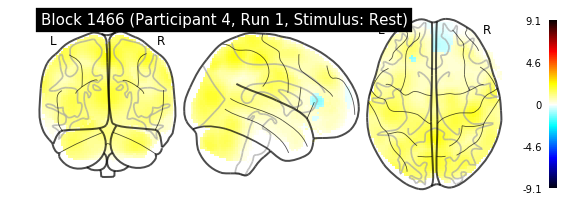

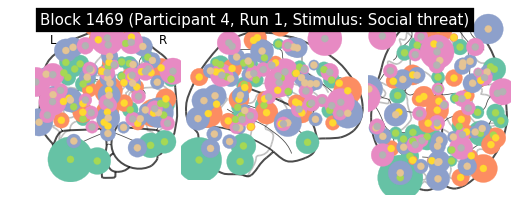

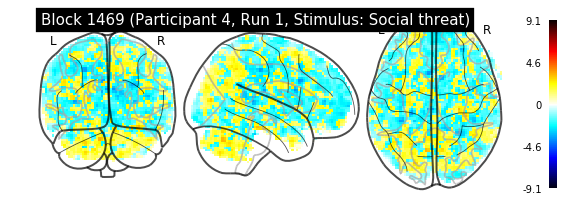

01/14/2019 10:03:16 Reconstruction Error (Frobenius Norm): 1.09962024e+03 out of 1.38460168e+03


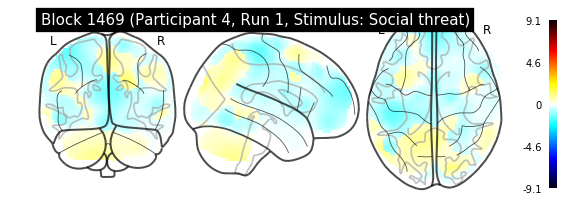

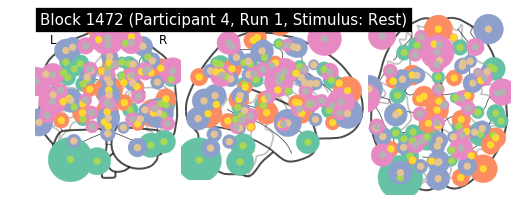

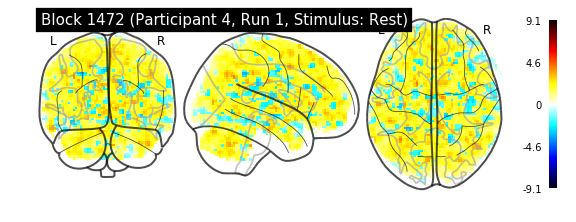

01/14/2019 10:03:21 Reconstruction Error (Frobenius Norm): 1.32771741e+03 out of 1.58889648e+03


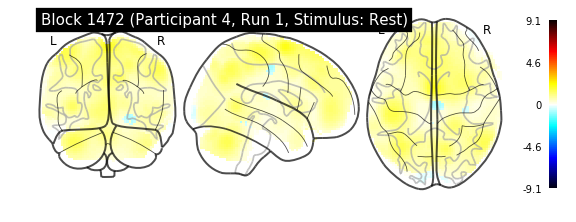

In [14]:
subject_runs = set([(block.subject, block.run) for block in dtfa._blocks])

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in dtfa._blocks if block.subject == subject and block.run == run]
    blocks.sort(key=lambda b: b.start_time)
    for block in blocks:
        index = dtfa._blocks.index(block)
        dtfa.plot_factor_centers(index, labeler=task_labeler)
        dtfa.plot_original_brain(index, labeler=task_labeler)
        dtfa.plot_reconstruction(index, labeler=task_labeler)


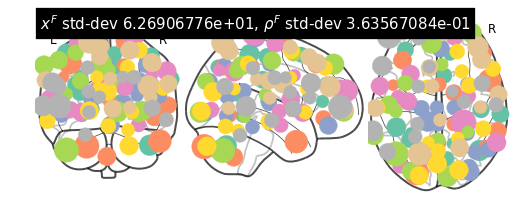

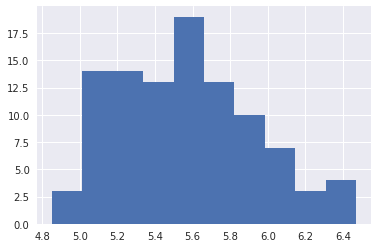

(<nilearn.plotting.displays.OrthoProjector at 0x7f0840d42d68>,
 tensor([[-4.3920e+01, -4.0454e+01,  5.9150e+01],
         [ 6.5538e+01, -2.6770e+01,  3.2001e+01],
         [-2.7776e+01, -4.7836e+01, -5.6987e+00],
         [-3.4387e+01,  4.0760e+01,  2.6470e+01],
         [ 9.1087e+00, -7.3702e+01,  4.5196e+01],
         [ 1.2622e+01,  3.6226e+01,  9.2117e+00],
         [ 4.3510e+01, -6.5087e+01, -3.7534e+01],
         [ 4.5111e+01, -2.1988e+01,  5.6259e+01],
         [-1.6096e+01, -6.2881e+01,  6.3564e-01],
         [ 1.5021e+01, -5.7797e+01,  2.1439e+01],
         [-3.0069e+01, -5.3569e+01,  1.7779e+01],
         [-2.8650e+01, -1.5263e+01,  3.4100e+01],
         [ 6.4544e+00,  1.3705e+01,  5.8278e+01],
         [ 1.2013e+00,  4.3732e+00,  9.9252e+00],
         [ 4.7907e+01,  3.7260e+01, -8.7457e+00],
         [-4.1247e+01, -6.7870e+01,  4.5574e+01],
         [ 5.4232e+01,  8.5633e+00, -3.3175e+01],
         [ 1.6648e+01, -4.4051e+00,  7.1785e+01],
         [-3.7356e+01,  2.9981e+01,  

In [15]:
dtfa.visualize_factor_embedding()

In [16]:
dtfa.average_reconstruction_error()

01/14/2019 10:06:36 Average reconstruction error (MSE): 8.34472355e-01
01/14/2019 10:06:36 Average data norm (Euclidean): 9.99668082e-01
01/14/2019 10:06:36 Percent average reconstruction error: 0.298482


(0.8344723547811909, 0.9996680820983042, 0.0029848201463575142)